In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
cbc = pd.read_csv("Synthetic_data.csv", index_col=False)
cbc

,Conclusion,HGB(g/dL),PLT(10^3/uL),Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),RBC Abnormal,RBC Suspect,PLT Abnormal,...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
0,MA,8.7,4,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,2.5,4.4,3.13,179,24.8,2.4,159.5,151.5,160.8,0.0000
1,ITP,8.5,17,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,2.5,4.4,2.03,29,24.8,3.3,159.5,151.5,160.8,0.0000
2,ACD,8.3,27,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,22.4,5.9,3.10,200,22.1,3.7,161.1,139.9,151.9,0.0280
3,MA,7.9,23,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,22.4,5.9,3.13,179,22.1,2.4,161.1,139.9,151.9,0.0280
4,MA,7.8,836,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.1,28.2,3.10,44,23.2,3.6,152.9,145.0,173.8,0.0344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CML-CP+IDA,7.2,72,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,52.4,2.1,7.46,462,12.5,2.3,121.7,81.4,142.2,0.0000
996,CML-CP+IDA,9.0,985,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.3,6.3,7.46,462,26.9,2.3,164.8,159.9,164.5,0.0257
997,GA,10.4,30,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,30.0,4.3,3.36,344,19.7,8.9,127.0,128.3,127.8,0.0705
998,ITP,8.0,66,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,3.8,6.8,1.94,8,24.1,2.9,158.9,148.7,152.4,0.0053


In [3]:
unique_val = cbc['Conclusion'].unique()
unique_val
cbc['Conclusion'] = cbc['Conclusion'].map({'HM': 0, 'SEP': 1, 'MDA':2, 'AA':3, 
                                           'ITP':4, 'NM':5, 'MF+IDA':6, 'IDA':7, 
                                           'MPY':8, 'MA':9, 'ITP+IDA':10 , 'CML-CP+IDA':11 , 
                                           'CGD':12 , 'HCV':13 , 'ETS':14 , 'Hypersplenism':15 , 
                                           'PV':16 , 'PRCA':17 , 'ACD':18 , 'PCA':19 , 'CDA':20 , 
                                           'GA' :21 , 'Extremly Increased Iron deposition':22})

In [4]:
# store the feature matrix (X) and response vector (y)
X = cbc.iloc[:, 1:]
y = cbc.iloc[:, 0]

In [5]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
# rearranging indexes of train_sets and test_set in order to do standardization on X sets
# there is a glitch that happens if indexes are not rearranged
# i.e. train set has 68 column which are selected randomly from the entire cbc dataset
# when strandardization is done on this train set it changes all records to NaN vallue if it has a index number > 68

# drop = True, drops the additional column of original indexes from dataframe that is made by default
# by default drop = False
X_train = X_train.reset_index(drop=True)

# reseting indexes of y_train, X_test and y_test as well
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [7]:
# note that an additional column of orginal indexes
X_train

,HGB(g/dL),PLT(10^3/uL),Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),RBC Abnormal,RBC Suspect,PLT Abnormal,PLT Suspect,...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
0,11.1,436,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.5,3.6,3.64,125,25.6,-1,147.9,154.8,129.2,0.0007
1,8.0,35,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.3,6.3,3.29,2,26.9,7.5,164.8,159.9,164.5,0.0257
2,9.4,16,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,5.0,9.4,3.64,125,22.4,-1,156.9,141.4,163.9,0.1343
3,9.5,51,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.9,5.5,2.90,43,27.8,4.1,174.6,163.2,173.5,0.0425
4,7.8,2,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.9,5.5,4.33,479,27.8,3,174.6,163.2,173.5,0.0425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,9.6,441,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,7.6,2.5,3.12,13,22.5,3.4,137.4,141.6,148.8,0.0260
796,7.8,836,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,4.8,7.6,2.52,18,24.7,9.2,145.3,151.1,130.5,0.0416
797,9.2,298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,46.6,1.8,2.44,872,15.2,-4.8,107.3,101.9,106.9,0.0158
798,9.7,475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1,28.2,1.24,105,23.2,1.7,152.9,145.0,173.8,0.0344


In [8]:
X_train[['Judgment', 'Positive(Diff.)', 'Positive(Count)' ,'Positive(Morph.)']] = X_train[
    ['Judgment', 'Positive(Diff.)', 'Positive(Count)' ,'Positive(Morph.)']].fillna(value=0)

In [9]:
## Cleaning numeric/continuous data by making sub-dataframe "numeric_data" to make changes in "cbc" datafrome
numeric_data = ['HGB(g/dL)', 'PLT(10^3/uL)', 'Q-Flag(RBC Agglutination?)','Q-Flag(Turbidity/HGB Interf?)',
                    'Q-Flag(Iron Deficiency?)','Q-Flag(HGB Defect?)','Q-Flag(Fragments?)',
                    'Q-Flag(PLT Clumps?)', 'RBC(10^6/uL)','HCT(%)','MCV(fL)',
                    'MCH(pg)','MCHC(g/dL)','RDW-SD(fL)','RDW-CV(%)','PDW(fL)','MPV(fL)','P-LCR(%)',
                    'PCT(%)','NRBC#(10^3/uL)', 'RET%(%)','RET#(10^9/L)', 'IRF(%)','LFR(%)',
                    'MFR(%)','HFR(%)','RET-He(pg)','[PLT-I(10^3/uL)]','[MicroR(%)]',
                    '[MacroR(%)]','[RBC-O(10^6/uL)]','[PLT-O(10^3/uL)]','[RBC-He(pg)]','[Delta-He(pg)]',
                    '[RET-Y(ch)]','[RET-RBC-Y(ch)]','[IRF-Y(ch)]','[FRC#(10^6/uL)]']

## displays mean, median, mode and other statistical information of dataframe numeric_data
X_train[numeric_data].describe()


# replacing unknown values with NaN so it can be futher treated in the imputer function
unknown_values = ['ERROR', '----', '++++']
X_train[numeric_data] = X_train[numeric_data].replace(unknown_values,np.NaN)


## checking if dataframe has any null values in numeric_data
# numeric_data.isna().sum()


# replacing all NaN values by mean using imputer function as per suggested by the domain expert
X_train[numeric_data] = X_train[numeric_data].fillna(X_train.mean().iloc[0])


X_train

,HGB(g/dL),PLT(10^3/uL),Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),RBC Abnormal,RBC Suspect,PLT Abnormal,PLT Suspect,...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
0,11.1,436,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.5,3.6,3.64,125,25.6,-1,147.9,154.8,129.2,0.0007
1,8.0,35,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.3,6.3,3.29,2,26.9,7.5,164.8,159.9,164.5,0.0257
2,9.4,16,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,5.0,9.4,3.64,125,22.4,-1,156.9,141.4,163.9,0.1343
3,9.5,51,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.9,5.5,2.90,43,27.8,4.1,174.6,163.2,173.5,0.0425
4,7.8,2,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.9,5.5,4.33,479,27.8,3,174.6,163.2,173.5,0.0425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,9.6,441,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,7.6,2.5,3.12,13,22.5,3.4,137.4,141.6,148.8,0.0260
796,7.8,836,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,4.8,7.6,2.52,18,24.7,9.2,145.3,151.1,130.5,0.0416
797,9.2,298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,46.6,1.8,2.44,872,15.2,-4.8,107.3,101.9,106.9,0.0158
798,9.7,475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1,28.2,1.24,105,23.2,1.7,152.9,145.0,173.8,0.0344


In [10]:
X_train

,HGB(g/dL),PLT(10^3/uL),Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),RBC Abnormal,RBC Suspect,PLT Abnormal,PLT Suspect,...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
0,11.1,436,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.5,3.6,3.64,125,25.6,-1,147.9,154.8,129.2,0.0007
1,8.0,35,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.3,6.3,3.29,2,26.9,7.5,164.8,159.9,164.5,0.0257
2,9.4,16,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,5.0,9.4,3.64,125,22.4,-1,156.9,141.4,163.9,0.1343
3,9.5,51,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.9,5.5,2.90,43,27.8,4.1,174.6,163.2,173.5,0.0425
4,7.8,2,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.9,5.5,4.33,479,27.8,3,174.6,163.2,173.5,0.0425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,9.6,441,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,7.6,2.5,3.12,13,22.5,3.4,137.4,141.6,148.8,0.0260
796,7.8,836,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,4.8,7.6,2.52,18,24.7,9.2,145.3,151.1,130.5,0.0416
797,9.2,298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,46.6,1.8,2.44,872,15.2,-4.8,107.3,101.9,106.9,0.0158
798,9.7,475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1,28.2,1.24,105,23.2,1.7,152.9,145.0,173.8,0.0344


In [11]:
## checking again for null values in "cbc" dataframe
np.array(X_train.isna().sum(axis=0))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [12]:
# applying Standardization Scaler Technique for scaling numeric_data columns between -1 to 1

numeric_df = pd.DataFrame(X_train[numeric_data])
numeric_df

,HGB(g/dL),PLT(10^3/uL),Q-Flag(RBC Agglutination?),Q-Flag(Turbidity/HGB Interf?),Q-Flag(Iron Deficiency?),Q-Flag(HGB Defect?),Q-Flag(Fragments?),Q-Flag(PLT Clumps?),RBC(10^6/uL),HCT(%),...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
0,11.1,436,70,90,80,80,10,20,3.74,31.8,...,1.5,3.6,3.64,125,25.6,-1,147.9,154.8,129.2,0.0007
1,8.0,35,80,90,90,50,40,0,3.26,26.7,...,1.3,6.3,3.29,2,26.9,7.5,164.8,159.9,164.5,0.0257
2,9.4,16,60,70,80,80,150,0,3.74,31.8,...,5.0,9.4,3.64,125,22.4,-1,156.9,141.4,163.9,0.1343
3,9.5,51,80,90,60,60,80,0,2.92,33.2,...,1.9,5.5,2.90,43,27.8,4.1,174.6,163.2,173.5,0.0425
4,7.8,2,80,90,80,90,80,10,4.40,34.7,...,1.9,5.5,4.33,479,27.8,3,174.6,163.2,173.5,0.0425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,9.6,441,60,90,80,70,20,10,3.12,27.6,...,7.6,2.5,3.12,13,22.5,3.4,137.4,141.6,148.8,0.0260
796,7.8,836,70,90,80,70,30,10,2.50,21.2,...,4.8,7.6,2.52,18,24.7,9.2,145.3,151.1,130.5,0.0416
797,9.2,298,40,70,70,60,300,0,2.52,25.8,...,46.6,1.8,2.44,872,15.2,-4.8,107.3,101.9,106.9,0.0158
798,9.7,475,60,70,80,50,70,20,1.28,11.2,...,1.1,28.2,1.24,105,23.2,1.7,152.9,145.0,173.8,0.0344


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_X_train = scaler.fit_transform(numeric_df)
standard_X_train = pd.DataFrame(standard_X_train, columns = numeric_data)

X_train[numeric_data] = standard_X_train

In [14]:
## checking again for null values in "cbc" dataframe
np.array(X_train.isna().sum(axis=0))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [15]:
# csv_file saving data processed after scaling

# for dropping index column while writing csv file
#X_train.to_csv("D:\\7th Semester\\FYP\\Dataset\\Scaling.csv", index=False)

# for dropping index column while reading from csv file
#df.read_csv(filename, index_col=False)  

# finding correlation between columns 
corr_matrix = X_train.corr()
# finding correlation wrt 'Conclusion' column
corr_matrix[y_train].sort_values(ascending=False)

In [16]:
X_train

,HGB(g/dL),PLT(10^3/uL),Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),RBC Abnormal,RBC Suspect,PLT Abnormal,PLT Suspect,...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
0,0.851887,1.585503,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,-0.829110,-0.522806,0.254708,-0.213881,0.682855,-1.665472,-0.211337,0.704545,-1.141577,-0.824602
1,-0.628410,-0.583437,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.847105,-0.179951,-0.072560,-0.900404,1.064708,1.022234,0.685964,1.038977,0.735910,-0.513196
2,0.040111,-0.686204,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,-0.514205,0.213697,0.254708,-0.213881,-0.257090,-1.665472,0.266516,-0.174159,0.703998,0.839553
3,0.087863,-0.496895,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,-0.793121,-0.281538,-0.437231,-0.671563,1.329067,-0.052848,1.206292,1.255374,1.214589,-0.303931
4,-0.723913,-0.761928,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,-0.793121,-0.281538,0.899895,1.761964,1.329067,-0.400669,1.206292,1.255374,1.214589,-0.303931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.135614,1.612547,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,-0.280276,-0.662488,-0.231519,-0.839008,-0.227716,-0.274189,-0.768832,-0.161044,-0.099120,-0.509459
796,-0.723913,3.749034,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,-0.532200,-0.014873,-0.792551,-0.811100,0.418496,1.559775,-0.349383,0.461918,-1.072434,-0.315142
797,-0.055392,0.839085,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.228660,-0.751376,-0.867355,3.955488,-2.371966,-2.867035,-2.366983,-2.764367,-2.327638,-0.636513
798,0.183366,1.796448,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.865099,2.600984,-1.989418,-0.325511,-0.022103,-0.811730,0.054137,0.061911,1.230545,-0.404827


In [17]:
# csv_file saving data processed before scaling
#X_train.to_csv("Dataset\FilteredParameters.csv", index=False)

In [18]:
X_test[['Judgment', 'Positive(Diff.)', 'Positive(Count)' ,'Positive(Morph.)']] = X_test[
    ['Judgment', 'Positive(Diff.)', 'Positive(Count)' ,'Positive(Morph.)']].fillna(value=0)

In [19]:
# now performing same task on X_test

## displays mean, median, mode and other statistical information of dataframe numeric_data
X_test[numeric_data].describe()


# replacing unknown values with NaN so it can be futher treated in the imputer function
# unknown_values = ['ERROR', '----', '++++']
X_test[numeric_data] = X_test[numeric_data].replace(unknown_values,np.NaN)


## checking if dataframe has any null values in numeric_data
# numeric_data.isna().sum()


# replacing all NaN values by mean using imputer function as per suggested by the domain expert
X_test[numeric_data] = X_test[numeric_data].fillna(X_train.mean().iloc[0])


X_test


,HGB(g/dL),PLT(10^3/uL),Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),RBC Abnormal,RBC Suspect,PLT Abnormal,PLT Suspect,...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
0,9.6,441,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,77.5,0.5,3.46,32,15.1,0.4,107.8,101.1,118.6,0.0028
1,10.5,43,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,7.4,3.3,4.21,10,22.1,6.2,141.7,140.0,138.6,0.0259
2,9.7,8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.3,6.3,4.47,349,26.9,2.3,164.8,159.9,164.5,0.0257
3,13.6,28,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,18.1,3.8,1.99,74,21.3,0.8,117.0,136.0,122.8,0.1003
4,7.7,28,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,4.5,10.8,1.24,105,24.6,1.7,156.3,151.0,127.4,0.0166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,10.8,37,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,4.0,9.6,3.12,13,24.0,3.4,152.3,148.5,154.7,0.0405
196,7.8,2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,6.1,7.4,3.36,169,23.6,5.9,161.0,146.6,153.4,0.0029
197,9.5,269,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.2,11.6,3.39,485,27.1,8,182.6,160.6,186.4,0.0018
198,7.1,58,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,24.0,4.6,3.26,195,19.8,6,144.9,128.5,147.8,0.0853


In [20]:
## checking again for null values in "cbc" dataframe
print(X_test.isna().sum(axis=0))

HGB(g/dL)           0
PLT(10^3/uL)        0
Judgment            0
Positive(Diff.)     0
Positive(Morph.)    0
                   ..
[Delta-He(pg)]      0
[RET-Y(ch)]         0
[RET-RBC-Y(ch)]     0
[IRF-Y(ch)]         0
[FRC#(10^6/uL)]     0
Length: 66, dtype: int64


In [21]:
numeric_df_test = pd.DataFrame(X_test[numeric_data])
numeric_df_test

,HGB(g/dL),PLT(10^3/uL),Q-Flag(RBC Agglutination?),Q-Flag(Turbidity/HGB Interf?),Q-Flag(Iron Deficiency?),Q-Flag(HGB Defect?),Q-Flag(Fragments?),Q-Flag(PLT Clumps?),RBC(10^6/uL),HCT(%),...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
0,9.6,441,40,80,80,80,60,0,3.53,31.0,...,77.5,0.5,3.46,32,15.1,0.4,107.8,101.1,118.6,0.0028
1,10.5,43,60,80,90,60,20,0,4.17,32.0,...,7.4,3.3,4.21,10,22.1,6.2,141.7,140.0,138.6,0.0259
2,9.7,8,80,90,100,70,40,0,4.40,28.3,...,1.3,6.3,4.47,349,26.9,2.3,164.8,159.9,164.5,0.0257
3,13.6,28,60,80,70,70,300,0,2.08,21.5,...,18.1,3.8,1.99,74,21.3,0.8,117.0,136.0,122.8,0.1003
4,7.7,28,70,80,80,50,30,0,1.28,11.2,...,4.5,10.8,1.24,105,24.6,1.7,156.3,151.0,127.4,0.0166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,10.8,37,70,80,80,70,110,20,3.12,27.6,...,4.0,9.6,3.12,13,24.0,3.4,152.3,148.5,154.7,0.0405
196,7.8,2,70,80,80,70,20,0,3.28,29.2,...,6.1,7.4,3.36,169,23.6,5.9,161.0,146.6,153.4,0.0029
197,9.5,269,80,90,90,90,10,0,3.39,27.2,...,1.2,11.6,3.39,485,27.1,8,182.6,160.6,186.4,0.0018
198,7.1,58,60,80,70,70,220,10,3.27,31.7,...,24.0,4.6,3.26,195,19.8,6,144.9,128.5,147.8,0.0853


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_X_test = scaler.fit_transform(numeric_df_test)
standard_X_test = pd.DataFrame(standard_X_test, columns = numeric_data)

X_test[numeric_data] = standard_X_test

In [23]:
#X_test = X_test.drop(keep, axis=1)

X_test.columns

Index(['HGB(g/dL)', 'PLT(10^3/uL)', 'Judgment', 'Positive(Diff.)',
       'Positive(Morph.)', 'Positive(Count)', 'RBC Abnormal', 'RBC Suspect',
       'PLT Abnormal', 'PLT Suspect', 'IP ABN(RBC)RBC Abn Distribution',
       'IP ABN(RBC)Dimorphic Population', 'IP ABN(RBC)Anisocytosis',
       'IP ABN(RBC)Microcytosis', 'IP ABN(RBC)Macrocytosis',
       'IP ABN(RBC)Hypochromia', 'IP ABN(RBC)Anemia',
       'IP ABN(RBC)Erythrocytosis', 'IP ABN(RBC)RET Abn Scattergram',
       'IP ABN(RBC)Reticulocytosis', 'IP ABN(PLT)PLT Abn Distribution',
       'IP ABN(PLT)Thrombocytopenia', 'IP ABN(PLT)Thrombocytosis',
       'IP ABN(PLT)PLT Abn Scattergram', 'IP SUS(RBC)RBC Agglutination?',
       'IP SUS(RBC)Turbidity/HGB Interf?', 'IP SUS(RBC)Iron Deficiency?',
       'IP SUS(RBC)HGB Defect?', 'IP SUS(RBC)Fragments?',
       'IP SUS(PLT)PLT Clumps?', 'Q-Flag(RBC Agglutination?)',
       'Q-Flag(Turbidity/HGB Interf?)', 'Q-Flag(Iron Deficiency?)',
       'Q-Flag(HGB Defect?)', 'Q-Flag(Fragments?)', '

In [24]:
X_test

,HGB(g/dL),PLT(10^3/uL),Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),RBC Abnormal,RBC Suspect,PLT Abnormal,PLT Suspect,...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
0,0.090584,1.488268,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,5.936329,-1.134752,0.112288,-0.779926,-2.514884,-1.182291,-2.323283,-2.884963,-1.642673,-0.788776
1,0.514091,-0.497786,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,-0.263469,-0.668290,0.838285,-0.903301,-0.407986,0.560570,-0.535899,-0.321576,-0.574181,-0.463714
2,0.137640,-0.672439,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.802967,-0.168509,1.089964,0.997795,1.036745,-0.611354,0.682053,0.989770,0.809516,-0.466528
3,1.972839,-0.572637,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.682862,-0.584993,-1.310667,-0.544392,-0.648774,-1.062094,-1.838211,-0.585164,-1.418289,0.583241
4,-0.803488,-0.572637,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,-0.519952,0.581162,-2.036665,-0.370545,0.344478,-0.791650,0.233889,0.403289,-1.172536,-0.594583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.655260,-0.527726,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.564173,0.381249,-0.216831,-0.886477,0.163887,-0.280811,0.022988,0.238546,0.285955,-0.258263
196,-0.756431,-0.702379,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,-0.378444,0.014744,0.015488,-0.011637,0.043492,0.470422,0.481697,0.113343,0.216503,-0.787369
197,0.043527,0.629973,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.811811,0.714436,0.044528,1.760477,1.096942,1.101458,1.620561,1.035898,1.979515,-0.802848
198,-1.085826,-0.422935,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.204671,-0.451718,-0.081312,0.134170,-1.100252,0.500472,-0.367178,-1.079390,-0.082675,0.372161


## MODEL TRAINING

In [25]:
# commonly used library for all models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

### APPLYING NAIVE BAYES

In [26]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [27]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [28]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

Gaussian Naive Bayes model
Accuracy(in %): 8.0
F1 score(in %): 3.126863097537585
Precision score(in %): 5.043290043290043
Recall score(in %): 6.368391709300799


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### APPLYING LOGISTIC REGRESSION

In [29]:
#Training the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [30]:
# making predictions on the testing set
y_pred = LR.predict(X_test)
#Finding the confusion matrix
from sklearn.metrics import mean_squared_error, confusion_matrix
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

38.405


In [31]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logestic model")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

Logestic model
Accuracy(in %): 26.0
F1 score(in %): 20.538839768691304
Precision score(in %): 22.886781539872175
Recall score(in %): 20.639196661923933


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### APPLYING SUPPORT VECTOR MACHINE CLASSIFIER

In [32]:
# PART 1
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [33]:
# making predictions on the testing set
predictions = model.predict(X_test)

In [34]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Support vector machine classifier model (1):")
print("Accuracy(in %):", accuracy_score(y_test, predictions)*100)
print("F1 score(in %):", f1_score(y_test, predictions, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, predictions, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, predictions, average="macro")*100)

Support vector machine classifier model (1):
Accuracy(in %): 37.0
F1 score(in %): 21.07065385394799
Precision score(in %): 21.761458037076526
Recall score(in %): 22.4928354473809


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
#PART 2

# Alter SVM with some parameters
model_poly = SVC(kernel='poly', degree=7, gamma=2)
model_poly.fit(X_train, y_train)

SVC(degree=7, gamma=2, kernel='poly')

In [36]:
# making predictions on the testing set
y_pred_poly = model_poly.predict(X_test)

In [37]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Support vector machine classifier model (2):")
print("Accuracy(in %):", accuracy_score(y_test, y_pred_poly)*100)
print("F1 score(in %):", f1_score(y_test, y_pred_poly, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred_poly, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred_poly, average="macro")*100)

Support vector machine classifier model (2):
Accuracy(in %): 18.5
F1 score(in %): 19.94321401539352
Precision score(in %): 23.96495324084838
Recall score(in %): 20.07557659731573


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# PART 3

# Alter SVM with some parameters
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
#print("Accuracy = ", (round((accuracy_score(y_test, predictions_linear))*100)))

SVC(kernel='linear')

In [39]:
# making predictions on the testing set
predictions_linear = model_linear.predict(X_test)

In [40]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Support vector machine classifier model (3):")
print("Accuracy(in %):", accuracy_score(y_test, predictions_linear)*100)
print("F1 score(in %):", f1_score(y_test, predictions_linear, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, predictions_linear, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred_poly, average="macro")*100)

Support vector machine classifier model (3):
Accuracy(in %): 37.5
F1 score(in %): 37.69232506177459
Precision score(in %): 37.64918090405347
Recall score(in %): 20.07557659731573


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# PART 4

# Alter SVM with some parameters
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [42]:
# making predictions on the testing set
predictions_sig = model_linear.predict(X_test)

In [43]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Support vector machine classifier model (4):")
print("Accuracy(in %):", accuracy_score(y_test, predictions_sig)*100)
print("F1 score(in %):", f1_score(y_test, predictions_sig, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, predictions_sig, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, predictions_sig, average="macro")*100)

Support vector machine classifier model (4):
Accuracy(in %): 37.5
F1 score(in %): 37.69232506177459
Precision score(in %): 37.64918090405347
Recall score(in %): 46.710572036658995


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### APPLYING EXTRA TREE REGRESSOR FOR IMPORTANT FEATURE SELECTION

In [44]:
# Feature selection by ExtraTreesRegressor(model based)
from sklearn.ensemble import ExtraTreesRegressor
reg= ExtraTreesRegressor()
reg.fit(X_train, y_train)

reg.feature_importances_

array([1.25648477e-04, 2.97634182e-04, 3.48360854e-07, 2.80898449e-04,
       3.22532385e-05, 1.68042641e-05, 3.91756663e-05, 1.55987692e-04,
       3.75742017e-05, 0.00000000e+00, 5.80339706e-04, 8.91803787e-06,
       1.11376296e-04, 8.17064361e-05, 3.05548866e-04, 0.00000000e+00,
       7.52459445e-06, 1.09982498e-05, 7.33296671e-05, 1.40648551e-04,
       2.35200771e-04, 4.44601525e-04, 1.39820624e-04, 0.00000000e+00,
       0.00000000e+00, 3.77274805e-05, 4.23778717e-06, 5.57120932e-05,
       7.61088882e-05, 8.75163901e-05, 5.60483261e-05, 2.99637426e-04,
       7.55259317e-02, 6.65591047e-02, 1.42684353e-04, 1.89856689e-04,
       7.70578890e-02, 9.58988155e-02, 1.06403403e-04, 4.82201094e-05,
       3.07225859e-04, 7.77734370e-02, 4.57382505e-02, 5.68580982e-02,
       3.09364384e-02, 2.77428477e-02, 5.37511642e-02, 4.20148650e-04,
       1.31227850e-04, 6.92625877e-05, 3.67520701e-05, 6.87230349e-04,
       3.51177600e-04, 1.84079308e-03, 1.17128670e-01, 9.83475213e-04,
      

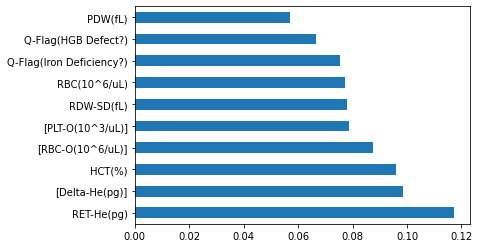

In [45]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### APPLYING DECISION TREE CLASSIFIER

In [46]:
from sklearn.tree import DecisionTreeClassifier
decision_model=DecisionTreeClassifier()
# fit independent varaibles to the dependent variables
decision_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
# making predictions on the testing set
y_pred = decision_model.predict(X_test)

In [48]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Decision Tree Classifier model (4):")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

Decision Tree Classifier model (4):
Accuracy(in %): 56.00000000000001
F1 score(in %): 38.33915650526857
Precision score(in %): 36.99460086705363
Recall score(in %): 42.37111318633058


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### APPLYING K-NEAREST NEIGHBOR(KNN)

In [49]:
# KNN Classifier
#The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, 
#it becomes difficult for the algorithm to calculate the distance in each dimension.
N=len(X_train)
from math import sqrt
k = int(sqrt(N/2))

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=k)
knn_model = model.fit(X_train, y_train)

In [51]:
# making predictions on the testing set
y_pred = knn_model.predict(X_test)

In [52]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("KNN model")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

KNN model
Accuracy(in %): 32.0
F1 score(in %): 16.85424541098999
Precision score(in %): 18.586736347431536
Recall score(in %): 17.912434787434787


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier
rn_model = RandomForestClassifier(n_estimators = 100, random_state = 1)
rn_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [54]:
# making predictions on the testing set
y_pred = rn_model.predict(X_test)

In [55]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Random Forest Classifier model")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

Random Forest Classifier model
Accuracy(in %): 91.5
F1 score(in %): 85.84562177233846
Precision score(in %): 85.94345712766764
Recall score(in %): 87.00838303111028


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# for creating model file to be used in flask app
#pickle.dump(rn_model, open('rn_model.pkl', 'wb'))

# STOCHASTIC GRADIENT DESCENT

In [57]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", max_iter=20, penalty="elasticnet", random_state=1)
clf.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(loss='log', max_iter=20, penalty='elasticnet', random_state=1)

In [58]:
# making predictions on the testing set
y_pred = clf.predict(X_test)

In [59]:
#comparing actual response values (y_test) with predicted response values (y_pred)
print("Stochastic Gradient Classifier model")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Stochastic Gradient Classifier model
Accuracy(in %): 23.0
F1 score(in %): 13.998655962487247
Precision score(in %): 17.22589986751958
Recall score(in %): 17.60087135087135
